# Homework 1 - data validation & cleaning (deadline 30. 10. 2022, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best as you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features, however, it does not mean that the teacher will give you more points. Focus on quality, not quantity.
* Properly comment all your steps. Comments are evaluated for 2 points of the total together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is the most challenging of the three, both timewise and computationally. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e. do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning (in your interest) 🙂 _(1.5 points)_
  3. Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only). _(2 points)_
  4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical and one datetime. _(1.5 points)_
  5. Find some outliers and describe your method. _(3 points, depends on creativity)_
  6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature**. _(1 + 3 points, depends on creativity)_
  7. Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later. _(2 points)_
  8. Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature. _(2 points)_

All your steps and following code **have to be commented!** Comments are evaluated for 2 points together with the final presentation of the solution.

**If you do all this properly, you will obtain 18 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

In [50]:
# importing basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.

In [51]:
# importing data
df = pd.read_csv('MetObjects.csv', sep=',') # load data as pandas DataFrame

/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gn/T/ipykernel_16119/4046042708.py:2: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MetObjects.csv', sep=',') # load data as pandas DataFrame


## Random data exploration

In [52]:
df.shape

(477804, 54)

In [53]:
df

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477799,23.112.2893,False,False,True,860869,NaN,Drawings and Prints,1923,Drawing,Phaeton #24567,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477800,23.112.2894,False,False,True,860870,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477801,53.600.1434,False,False,False,860871,NaN,Drawings and Prints,1953,Print,"Forest landscape with cattle drinking, a woman...",...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477802,23.112.2895,False,False,True,860872,NaN,Drawings and Prints,1923,Drawing,Phaeton with folding top,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [55]:
df.nunique()

Object Number              474872
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  477804
Gallery Number                609
Department                     19
AccessionYear                 280
Object Name                 28449
Title                      239091
Culture                      7180
Period                       1873
Dynasty                       403
Reign                         389
Portfolio                    3563
Constituent ID              46224
Artist Role                  6837
Artist Prefix                8046
Artist Display Name         64531
Artist Display Bio          52439
Artist Suffix                2729
Artist Alpha Sort           64489
Artist Nationality           5037
Artist Begin Date           29716
Artist End Date             29685
Artist Gender                 284
Artist ULAN URL             37235
Artist Wikidata URL         39362
Object Date                 32696
Object Begin D

In [56]:
df.describe(include='all')

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
count,477804,477804,477804,477804,477804.000000,51776,477804,474248.0,476113,448619,...,2095,399598,24198,477804,22265,0.0,477804,200400,200400,200400
unique,474872,2,2,2,NaN,609,19,280.0,28449,239091,...,229,1212,1415,477804,22213,NaN,1,44830,44370,44564
top,62.635,False,False,True,NaN,774,Drawings and Prints,1963.0,Print,Terracotta fragment of a kylix (drinking cup),...,Upper Sepik River,Prints,"© Walker Evans Archive, The Metropolitan Museu...",http://www.metmuseum.org/art/collection/search/1,https://www.wikidata.org/wiki/Q97732991,NaN,"Metropolitan Museum of Art, New York, NY",Flowers,http://vocab.getty.edu/page/aat/300132399,https://www.wikidata.org/wiki/Q506
freq,4,475320,469816,245307,NaN,7054,167152,34280.0,99439,6415,...,362,80981,7314,1,17,NaN,477804,8359,8359,8359
mean,NaN,NaN,NaN,NaN,387582.167811,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,237374.736434,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,210119.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,371186.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,563883.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.duplicated().sum()

0

In [58]:
# df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [59]:
df.set_index('Object ID', inplace=True) # use IDs as index
df.duplicated().sum()

0

No duplicates

#  2. Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning (in your interest) 🙂 _(1.5 points)_

## 2a Since the assigment says to include the `Object Name`, lets start with that

In [60]:
df['Object Name'].describe()

count     476113
unique     28449
top        Print
freq       99439
Name: Object Name, dtype: object

In [61]:
# df['Title_len'] = df.apply(lambda x: len(x['Title']), axis=1)
#df['Object_name_len'] = df['Object Name'].apply(lambda x: len(str(x)))
df['Object_name_len'] = df['Object Name'].str.len()

In [62]:
df['Object_name_len'].describe()

count    476113.000000
mean         10.476992
std           8.560064
min           2.000000
25%           5.000000
50%           7.000000
75%          13.000000
max          80.000000
Name: Object_name_len, dtype: float64

In [63]:
# df.groupby('Object Name').nunique().sort_values('Object_name_len')
# df.loc[df.groupby('Object Name').Object_name_len.nsmallest(3).index]
# dataframe with records without duplicated 'Object name'
df_dedup_name = df.drop_duplicates(subset=['Object Name'])

In [64]:
# get 20 of the shortest Object names
df_dedup_name.loc[df_dedup_name.Object_name_len.nsmallest(20).index]['Object Name']

Object ID
24857      Ax
248056     As
500526     Ūd
500580     Po
500582     Lo
500589     Bo
500606     Gu
501092     Ty
503211     So
503339     Em
503765     Se
504702     Yu
327       Mug
329       Keg
688       Cup
896       Box
948       Jar
1401      Cap
2080      Pin
2126      Urn
Name: Object Name, dtype: object

after looking these up on the internet, the names do seem to make sense

altough, wait, 'Ax'? I know it as 'Axe', I wonder if that is there as well?

In [65]:
df.loc[df['Object Name'] == 'Ax']

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
24857,69.156,False,False,True,379.0,Arms and Armor,1969.0,Ax,Ax,Syrian,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
25577,04.3.467,False,True,True,NaN,Arms and Armor,1904.0,Ax,Dervish Ax,Turkish,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
32944,23.276.2,False,False,True,370.0,Arms and Armor,1923.0,Ax,Ax of the Palstave Type,British,...,Miscellaneous,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
37759,2000.284.58,False,False,True,244.0,Asian Art,2000.0,Ax,NaN,Vietnam,...,Metalwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
38627,2000.284.61,False,False,True,244.0,Asian Art,2000.0,Ax,NaN,Indonesia,...,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555849,07.231.14,False,False,False,109.0,Egyptian Art,1907.0,Ax,Ax (?),NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
557942,17.6.65,False,False,False,NaN,Egyptian Art,1917.0,Ax,Ax,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0
569247,26.2.65,False,False,False,NaN,Egyptian Art,1926.0,Ax,Ax,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,2.0


In [66]:
df.loc[df['Object Name'] == 'Axe']

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
25066,04.3.40,False,False,False,NaN,Arms and Armor,1904.0,Axe,Axe,German,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
25578,04.3.470,False,False,False,NaN,Arms and Armor,1904.0,Axe,Axe,German,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
27065,14.25.464,False,False,False,NaN,Arms and Armor,1914.0,Axe,Axe,Swedish,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
27882,46.79.2,False,False,False,NaN,Arms and Armor,1946.0,Axe,Axe,Norwegian,...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
30784,36.25.1800,False,False,False,NaN,Arms and Armor,1936.0,Axe,Axe,"Indian, south India",...,Shafted Weapons,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327471,1992.149.7,False,False,True,NaN,Ancient Near Eastern Art,1992.0,Axe,Axe with shaft hole,Bactria-Margiana Archaeological Complex,...,Metalwork-Implements,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0
329076,1982.5,True,True,True,403.0,Ancient Near Eastern Art,1982.0,Axe,"Shaft-hole axe head with bird-headed demon, bo...",Bactria-Margiana Archaeological Complex,...,Metalwork-Implements,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q29384562,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Dragons|Boars|Demons,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...,3.0
332605,1989.281.45,False,False,True,NaN,Ancient Near Eastern Art,1989.0,Axe,Fragmentary axe head (?),Bactria-Margiana Archaeological Complex,...,Metalwork-Implements,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,3.0


Both of these names are indeed used for the same thing. (By checking the department "Arms and Armor" we can make sure, that those 2 different names, do indeed mean the same thing)
Solving this problem might be a bit difficult, but maybe we could compare against a list of synonyms or translations

In [67]:
# get 20 of the shortest Object names
df_dedup_name.loc[df_dedup_name.Object_name_len.nlargest(20).index]['Object Name']
# Hmm, kinda SUS

Object ID
24684     Double-barreled flintlock shotgun with exchang...
24977     Nineteen ornamental fittings from a horse harn...
30379     Ammunition belt (Kamr) Object Cards.  S. martz...
30958     Blade and for a hatchet (Nata) and mounting fo...
34765     Set of Pommel (Fuchigashira), Sword grip ornam...
35744     Top two lames from a right thigh defense (Cuis...
545279    Pall, sheet, Wah, rather coarse, light weight,...
545619    String of 16 spherical, 1 barrel and 1 cylindr...
552577    Cone, round, Padiamunnebnesuttawy, chancellor,...
553399    Scarab, Menkheperra, nsw bit, royal title, mry...
554965    Cone, Ptahmose, circular impression, high prie...
555025    Cone, rectangular impression, Neferhotep, scri...
555048    Cone, circular impression, Kaemamun, prophet, ...
555113    Cylinder seal with name of Amenemhat II and th...
556167    Cylinder seal with cartouches of Nubkaure (Ame...
557109    Scarab, pseudo-inscription in oval, hieroglyph...
557815    Facsimile, Panehsy (

From example above we can see the longest objects names.

Lets take a look at `Scarab, Menkheperra, nsw bit, royal title, mry imn, beloved of Amun, Thutmose II` and see if there is only `Scarab`

In [68]:
df.loc[df['Object Name'] == 'Scarab']

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
243605,74.51.4193,False,False,True,171.0,Greek and Roman Art,1874.0,Scarab,Agate scarab,Greek,...,Gems,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cows|Scarabs,http://vocab.getty.edu/page/aat/300250120|http...,https://www.wikidata.org/wiki/Q830|https://www...,6.0
243606,74.51.4194,False,False,True,171.0,Greek and Roman Art,1874.0,Scarab,Scarab,Cypriot,...,Gems|Gold and Silver,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Mythical Creatures,http://vocab.getty.edu/page/aat/300375725,https://www.wikidata.org/wiki/Q2239243,6.0
244873,81.6.2,False,False,False,NaN,Greek and Roman Art,1881.0,Scarab,Scarab,Roman,...,Gems,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,6.0
244875,81.6.4,False,False,True,170.0,Greek and Roman Art,1881.0,Scarab,Banded agate scarab,Etruscan,...,Gems,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Scarabs,http://vocab.getty.edu/page/aat/300230813,https://www.wikidata.org/wiki/Q2442735,6.0
244876,81.6.5,False,False,False,NaN,Greek and Roman Art,1881.0,Scarab,Scarab,Greek or Etruscan,...,Gems,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575445,23.3.183,False,False,True,117.0,Egyptian Art,1923.0,Scarab,Scarab,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Scarabs,http://vocab.getty.edu/page/aat/300230813,https://www.wikidata.org/wiki/Q2442735,6.0
575446,23.3.187,False,False,True,117.0,Egyptian Art,1923.0,Scarab,Scarab,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Scarabs,http://vocab.getty.edu/page/aat/300230813,https://www.wikidata.org/wiki/Q2442735,6.0
575485,23.3.260,False,False,True,117.0,Egyptian Art,1923.0,Scarab,Scarab,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Scarabs,http://vocab.getty.edu/page/aat/300230813,https://www.wikidata.org/wiki/Q2442735,6.0


Aha, there is also only `Scarab`, therefore another consistency problem.
To remove this kind of incostistency problem we could use `.apply(lambda x: x.split(',')[0])`, same thing should be checked and done for other special characters (`|`, `.`, `/`, ... )

Check for unprintable characters (only LF newline in this case)

In [69]:
from string import printable
# df.loc[str(df['Object Name']).isalnum()]
# df.loc[df['Object Name'].apply(lambda x: not str(x).isalnum())]
# df.loc[df['Object Name'].apply(lambda x: set(str(x)).difference(printable))]
df.loc[df['Object Name'].apply(lambda x: '\n' in str(x))]


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
3580,16.177,False,False,True,751,The American Wing,1916.0,"Exterior Doorway from One West Broad Street,\r...","Exterior Doorway from One West Broad Street, S...",American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,63.0
3658,1971.180.65b,False,False,False,741,The American Wing,1971.0,Fire Tongs\r\n,Fire Tongs,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,12.0
5612,1975.400.3,False,False,True,704,The American Wing,1975.0,Plate\r\n,Plate,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0
12890,46.67.84,False,False,True,730,The American Wing,1946.0,Painting\r\nFrigate Presiden\r\nFrigate Presid...,Fight Between the U.S. Frigate President and H...,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19924726,NaN,"Metropolitan Museum of Art, New York, NY",Ships,http://vocab.getty.edu/page/aat/300082981,https://www.wikidata.org/wiki/Q11446,66.0
19200,2007.43,False,False,True,NaN,The American Wing,2007.0,Panel\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nWindow,Spring,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Women|Lambs|Flowers|Leaves|Spring,http://vocab.getty.edu/page/aat/300025943|http...,https://www.wikidata.org/wiki/Q467|https://www...,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788902,21.91.243,False,False,True,NaN,Drawings and Prints,1921.0,Print\r\n,Chinoiserie Ornament,NaN,...,Prints|Ornament & Architecture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Ornament|Men|Chinoiserie,http://vocab.getty.edu/page/aat/300164595|http...,https://www.wikidata.org/wiki/Q335261|https://...,7.0
788903,21.91.244,False,False,True,NaN,Drawings and Prints,1921.0,Print\r\n,Chinoiserie Ornament,NaN,...,Prints|Ornament & Architecture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Boys|Playing Cards|Chinoiserie,http://vocab.getty.edu/page/aat/300247598|http...,https://www.wikidata.org/wiki/Q3010|https://ww...,7.0
820446,26.50.1(146),False,False,False,NaN,Drawings and Prints,1926.0,Drawing \r\nPrint,Five dancing or fighting cupids,NaN,...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,15.0


We can see a name such as `Bowl\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n`
So we should clean the names of any unprintable characters. For this particular case a simple `name.strip()` would work, but a better solution is needed for all rows

In [70]:
# df_dedup_name['Object_name_commas_count'] = df_dedup_name['Object Name'].apply(lambda x: str(x).count(','))
# df_dedup_name.Object_name_commas_count.describe()

Lets take a look if case sensitivity plays a role

In [71]:
# get number of duplicate names
df.duplicated(subset=['Object Name']).sum()

449354

In [72]:
# get number of duplicated names when case sensitivity does not matter
df['Object Name'].apply(lambda x: str(x).upper()).duplicated().sum()

450202

We can see that there are inconsistencies in case sensitivity. We should converted all rows in some way (all upper, all lower, 1st upper, ...)

## 2b

Lets decide on 2nd column. When I look back at the initial data exploration, 1st thing that seems very suspicious is `Artist Gender,284` when looking at number of unique values, so `Artist Gender` it is.

In [73]:
# get list of unique values
df_dedup_artist_gender = df.drop_duplicates(subset=['Artist Gender'])
df_dedup_artist_gender

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
35,04.1a–c,True,True,False,706,The American Wing,1904.0,Vase,The Adams Vase,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/35,https://www.wikidata.org/wiki/Q83545838,NaN,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...,4.0
282,25.173a–o,True,True,False,700,The American Wing,1925.0,Window,Autumn Landscape,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q83560015,NaN,"Metropolitan Museum of Art, New York, NY",Windows|Waterfalls|Landscapes|Autumn,http://vocab.getty.edu/page/aat/300002944|http...,https://www.wikidata.org/wiki/Q35473|https://w...,6.0
311,1984.98,False,False,False,701,The American Wing,1984.0,Baluster,"Baluster from the Guaranty Building, Buffalo, ...",American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
444,18.110.64,False,True,True,729,The American Wing,1918.0,Bedstead,Bedstead,American,...,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838183,60.502.7(4),False,False,False,NaN,Drawings and Prints,1960.0,Book,Illustrated London Almanack,NaN,...,Books,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
840803,40.101(56),False,False,False,NaN,Drawings and Prints,1940.0,Print,Artist Color Proof Associates (leaflet),NaN,...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0
849227,62.600.15(2),False,False,False,NaN,Drawings and Prints,1962.0,Book,The Life of Her Most Gracious Majesty the Queen,NaN,...,Books,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0


We can see that it is a big mess, with values like `||||||||||||||Female|||||||`
To find all inconsistencies I'll actually try to clean the data

In [74]:
# first convert NaN into empty string
df_dedup_artist_gender = df_dedup_artist_gender.fillna('')

In [75]:
def clean_artist_gender(text: str) -> str:
    # split string into list by `|`
    split_list = text.split('|')
    # remove empty substrings
    split_list = list(filter(len, split_list))
    # deduplicate substrings
    split_list = list(set(split_list))
    # make into string. If there are multiple substrings in list, join it with `, ` (Spoiler there arent any anyway)
    final_value = ", ".join(split_list)
    return final_value

In [76]:
df_dedup_artist_gender = df_dedup_artist_gender['Artist Gender'].apply(lambda x: clean_artist_gender(str(x)))
df_dedup_artist_gender

Object ID
1               
35              
282       Female
311             
444             
           ...  
838183    Female
840803    Female
849227    Female
853788    Female
858033    Female
Name: Artist Gender, Length: 285, dtype: object

In [77]:
# lets dedup again
df_dedup_artist_gender = df_dedup_artist_gender.drop_duplicates()
df_dedup_artist_gender

Object ID
1            
282    Female
Name: Artist Gender, dtype: object

### yikes!
I just noticed that use of the `||||||||||||||Female|||||||` is because there are multiple authors, which makes it not a consistency problem. (It would be better to check if for all author columns the number of `|` is the same in one row, but I am not gonna bother here)
However I'll still count this one as incorrect since there are is no info if the artist is a male. Maybe all null values are male, but we cannot say for sure.

## 2c

I could pick any author related column, but let's look at smth else.
Again, looking at the data exploration, I notice `Object Date`, so lets explore that

In [78]:
# get list of unique values
df_dedup_object_date = df.drop_duplicates(subset=['Object Date'])
df_dedup_object_date

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
2,1980.264.5,False,False,False,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
3,67.265.9,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
10,1979.486.3,False,False,False,NaN,The American Wing,1979.0,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
11,1979.486.2,False,False,False,NaN,The American Wing,1979.0,Coin,Two-and-a-half-dollar Liberty Head Coin,NaN,...,NaN,NaN,http://www.metmuseum.org/art/collection/search/11,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858211,67.539.162,False,False,False,NaN,Drawings and Prints,1967,Print,Ornamental frame with figures,NaN,...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0
858213,1980.1124.25,False,False,False,NaN,Drawings and Prints,1980,Print,Portrait of Benjamin West,NaN,...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0
858241,17.3.3442-83,False,False,False,NaN,Drawings and Prints,1917,Print,Six guineas entrance and a guinea a lesson,NaN,...,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0


out of some examples there are few ways of representations

```
1853
1909-27
1665-1700
ca. 1887
after 1866
ca. 1902–3
19th century
1821–ca. 1843
1716 or 1719 (edition)
1787 (?)
1879, cast probably 1880
September 25, 1973
```

This makes it clear the ranges and uncertainty are represented in multiple ways => inconsistency

# 3. Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only). _(2 points)_

## 3A
During step 2c when exploring `Object date` I notice 2 other columns `Object Begin Date` and `Object end Date`, I think that there could be integrity problems between those, since there should be direct relationship between these 3. Lets explore
Lets try to create our own `Object Date` from the other two columns

In [79]:
# convert `Object Date` to string
df['Object Date'] = df['Object Date'].astype(str)

In [80]:
def combine_date(begin: str, end: str) -> str:
    if begin == end:
        return str(begin)
    if begin[0:3] == end[0:3]:
        return f"{begin}–{end[3:]}"
    if begin[0:2] == end[0:2]:
        return f"{begin}–{end[2:]}"
    return f"{begin}–{end}"
        # return f"{begin}-{end}"

In [81]:
df['object_date_combined'] = df.apply(lambda x: combine_date(str(x['Object Begin Date']), str(x['Object End Date'])), axis=1)
df.object_date_combined

Object ID
1              1853
2              1901
3           1909–27
4           1909–27
5           1909–27
            ...    
860869         1904
860870         1904
860871      1768–78
860872    1890–1900
860873    1890–1900
Name: object_date_combined, Length: 477804, dtype: object

In [82]:
# show rows where these differ
df.loc[df['Object Date'] != df['object_date_combined']][['Object Date', 'object_date_combined']]

,Object Date,object_date_combined
Object ID,,
35,1893–95,1893–5
36,ca. 1887,1884–7
37,ca. 1785,1782–5
38,ca. 1785,1782–5
44,ca. 1790,1787–90
...,...,...
860867,1758,1753–63
860868,1758,1753–63
860871,after 1773,1768–78


from the previous cell output we can see that `Object Date` is kind of random. I am talking about deleting leading digits in the end part, example:
begin = 1755
end = 1758
this is represented in multiple different ways, so like
1755-1758
1755-58
1755-8

there is also a problem with the `ca.`
`ca. 1875` can mean `1872-1875`, but also `1872-1878`

there are also examples like `19th century` which is not that bad, but there are also things like `after 1885`, like what is that supposed to mean, what range after?

## 3B
as I have already talked about in 2B, the number of `|` in all of the artist related columns should be the same, since this is used when there are multiple columns. So if the number of these is different on a row, then it could be an integrity problem, lets check

In [83]:
# find out list of all artist columns
df.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Gallery Number', 'Department', 'AccessionYear', 'Object Name', 'Title',
       'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Constituent ID',
       'Artist Role', 'Artist Prefix', 'Artist Display Name',
       'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort',
       'Artist Nationality', 'Artist Begin Date', 'Artist End Date',
       'Artist Gender', 'Artist ULAN URL', 'Artist Wikidata URL',
       'Object Date', 'Object Begin Date', 'Object End Date', 'Medium',
       'Dimensions', 'Credit Line', 'Geography Type', 'City', 'State',
       'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus',
       'Excavation', 'River', 'Classification', 'Rights and Reproduction',
       'Link Resource', 'Object Wikidata URL', 'Metadata Date', 'Repository',
       'Tags', 'Tags AAT URL', 'Tags Wikidata URL', 'Object_name_len',
       'object_date_combined'],
      dtype='object')

In [84]:
artist_columns=[
    'Artist Role', 'Artist Prefix', 'Artist Display Name', 'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Artist Gender', 'Artist ULAN URL', 'Artist Wikidata URL'
]

In [85]:
# get number of occurrences for `|` for all artist columns
artist_pipe_counts = {}
for col in artist_columns:
    artist_pipe_counts[col] = df[col].apply(lambda x: str(x).count('|'))

In [86]:
# example
df.loc[artist_pipe_counts['Artist Role'] != artist_pipe_counts['Artist Display Name']]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,


In [87]:
for i in range(0, len(artist_columns)-1):
    a = artist_columns[i]
    b = artist_columns[i+1]
    missmatch_count = len(df.loc[artist_pipe_counts[a] != artist_pipe_counts[b]])
    if missmatch_count > 0:
        print(f"Pipe count does not match for columns `{a}` and `{b}`")


Based on this we know that the count of `|` occurrences is the same for all columns, hence integrity is fine (at least in this case anyway)

# 4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical and one datetime. _(1.5 points)_

In [88]:
# lets get all object type columns
df.select_dtypes(include=['object'])

,Object Number,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Repository,Tags,Tags AAT URL,Tags Wikidata URL,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1853
2,1980.264.5,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1901
3,67.265.9,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1909–27
4,67.265.10,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1909–27
5,67.265.11,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1909–27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860869,23.112.2893,NaN,Drawings and Prints,1923,Drawing,Phaeton #24567,NaN,NaN,NaN,NaN,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,1904
860870,23.112.2894,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,NaN,NaN,NaN,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,1904
860871,53.600.1434,NaN,Drawings and Prints,1953,Print,"Forest landscape with cattle drinking, a woman...",NaN,NaN,NaN,NaN,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1768–78


### 4a
as far as datetime, we can choose AssentionYear. It appears to represent years only, but it still doesnt hurt to change to datetime. One of the advantage might be future comparisons

In [89]:
def convert_accession_year(inp) -> int:
    if pd.isna(inp):
        return inp
        # return -1
    if isinstance(inp, str):
        # convert records like '2005-02-15' into 2005
        return inp.split('-')[0]
    return int(inp)

In [90]:
# df['AccessionYear'] = df['AccessionYear'].apply(convert_accession_year)
# # df['AccessionYear'] = df['AccessionYear'].apply(lambda x: int(x) if pd.notna(x) else x)
# df['AccessionYear']= pd.to_datetime(df['AccessionYear'], format='%y')
df['AccessionYear']= pd.to_datetime(df['AccessionYear'])

### 4b,c,d
Department seems like a good candidate for categorical data type with 19 unique values`

In [91]:
# sex_category = pd.api.types.CategoricalDtype(categories=['male','female'], ordered=False)
# df['Department'] = df['Department'].astype(sex_category)
df['Department'] = pd.Categorical(df['Department'])

these also look like good candinates
```
Dynasty,403
Reign,389
```

In [92]:
df['Dynasty'] = pd.Categorical(df['Dynasty'])
df['Reign'] = pd.Categorical(df['Reign'])

If I would do the already mentioned cleaning for `Object Name`, then it would also be a good candidate for Categorical data type, but it is definitely not in the current state.

### 4e
as for the numerical data type, I am currently thinking `Constituent ID`, lets try it

In [93]:
try:
    df['Constituent ID']= pd.to_numeric(df['Constituent ID'])
except Exception as e:
    print(e)

Integer out of range. at position 389


Oh, the IDs dont fit into 64bit integer, never mind, lets take a look at smth else.
Maybe `Galery Number`, somebody could consider it as a categorical data type, but I thinking about it more as an ID.

In [94]:
# let's 1st take a look at the data
df.drop_duplicates(subset=['Gallery Number'])

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1853
33,64.62,False,False,False,774,The American Wing,1970-01-01 00:00:00.000001964,Bust,Bust of Abraham Lincoln,American,...,NaN,http://www.metmuseum.org/art/collection/search/33,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Men|Abraham Lincoln|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...,4.0,1876
35,04.1a–c,True,True,False,706,The American Wing,1970-01-01 00:00:00.000001904,Vase,The Adams Vase,American,...,NaN,http://www.metmuseum.org/art/collection/search/35,https://www.wikidata.org/wiki/Q83545838,NaN,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men,http://vocab.getty.edu/page/aat/300249525|http...,https://www.wikidata.org/wiki/Q729|https://www...,4.0,1893–5
42,60.58.1,False,False,True,724,The American Wing,1970-01-01 00:00:00.000001960,Andiron,Andiron,American,...,NaN,http://www.metmuseum.org/art/collection/search/42,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1795–1810
62,22.120.1,False,False,True,741,The American Wing,1970-01-01 00:00:00.000001922,Andiron,Andiron,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/62,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1797–1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854924,2021.326.1,False,False,False,253,Asian Art,2021-01-01 00:00:00.000000000,Tangka,NaN,Central Tibet,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,6.0,1600–1799
855358,"2021.323a, b",False,False,False,207,Asian Art,2021-01-01 00:00:00.000000000,Hexagonal vessel with cover,손대현 주칠빙렬무늬 함|孫大鉉 八角牡丹文 器 |Hexagonal vessel wit...,Korea,...,© Sohn Daehyun,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,27.0,2018
855857,F128.9.N3 H35 1925,True,False,False,Watson Library,The Libraries,NaT,NaN,"Survey Graphic. Volume LIII, No. 11, March 1 1...",NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,1925


as far as all of the float values go, all of those have `0` as the decimal value, so those can be safely converted to int.
However, there are some string values as well, since those are not duplicated, lets just replace them with NaN.

In [95]:
# https://stackoverflow.com/questions/53668421/replace-a-string-value-with-nan-in-pandas-data-frame-python
df['Gallery Number']= pd.to_numeric(df['Gallery Number'], errors='coerce')


# 5. Find some outliers and describe your method. _(3 points, depends on creativity)_

### 5.1
I already found a few outliers in 4e. There were 4 rows which had Galery Number as String, which I would consider very outliery

### 5.2


In [96]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1853
2,1980.264.5,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1901
3,67.265.9,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1909–27
4,67.265.10,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1909–27
5,67.265.11,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1909–27


There is only a few numerical/date columns, which makes this more difficult

<AxesSubplot: >

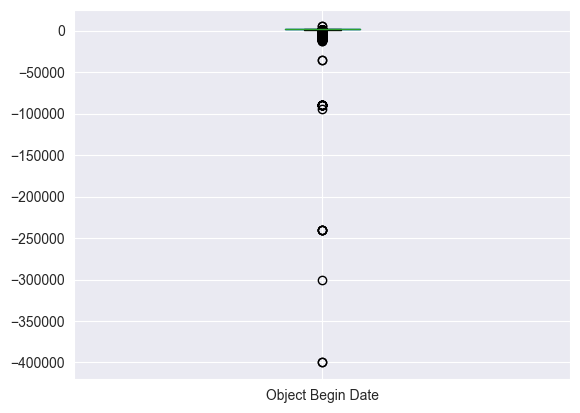

In [97]:
# sns.boxplot(data=df['Object Begin Date'])
# df.boxplot(column=['Object_name_len'])
df.boxplot(column=['Object Begin Date'])
# sns.boxplot(data=df.Object_name_len)

In this case it would not be good to mark all of `<25` and `>75` quantile rows as outliers, since this is not a gaussian distribution, but more as a exponential one or skewed poisson distribution. Based on the graph lets mark all values `<-5000` as outliers

In [98]:
# Q3 = df.quantile(0.75)
# df['Object Begin Date'] > Q3['Object Begin Date']
df.loc[df['Object Begin Date'] < -5000]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
22143,12.37.110–.119,False,False,False,NaN,Arms and Armor,1970-01-01 00:00:00.000001912,Ten spearheads and sinkers,Ten Spearheads and Sinkers,Japanese,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,26.0,-12500–-300
22144,12.37.100–.109,False,False,False,NaN,Arms and Armor,1970-01-01 00:00:00.000001912,Ten spearheads and sinkers,Ten Spearheads and Sinkers,Japanese,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,26.0,-12500–-300
25608,08.99.1,False,False,True,NaN,Arms and Armor,1970-01-01 00:00:00.000001908,Arrowhead,Arrowhead,"European, Italian peninsula",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,9.0,-10025–-4975
44392,1994.605.92,False,False,True,NaN,Asian Art,1970-01-01 00:00:00.000001994,Figure,NaN,China,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Human Figures|Farmers,http://vocab.getty.edu/page/aat/300404114|http...,https://www.wikidata.org/wiki/Q5937779|https:/...,6.0,-10000–1644
44395,1994.605.95,False,False,True,NaN,Asian Art,1970-01-01 00:00:00.000001994,Belt buckle,NaN,China,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,11.0,-10000–1644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717707,08.99.11,False,False,True,NaN,Arms and Armor,1970-01-01 00:00:00.000001908,Arrowhead,Arrowhead,"European, Italian peninsula",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,9.0,-10025–-4975
717708,08.99.12,False,False,True,NaN,Arms and Armor,1970-01-01 00:00:00.000001908,Arrowhead,Arrowhead,"European, Italian peninsula",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,9.0,-10025–-4975
717729,08.99.9,False,False,True,NaN,Arms and Armor,1970-01-01 00:00:00.000001908,Arrowhead,Arrowhead,"European, Italian peninsula",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,9.0,-10025–-4975


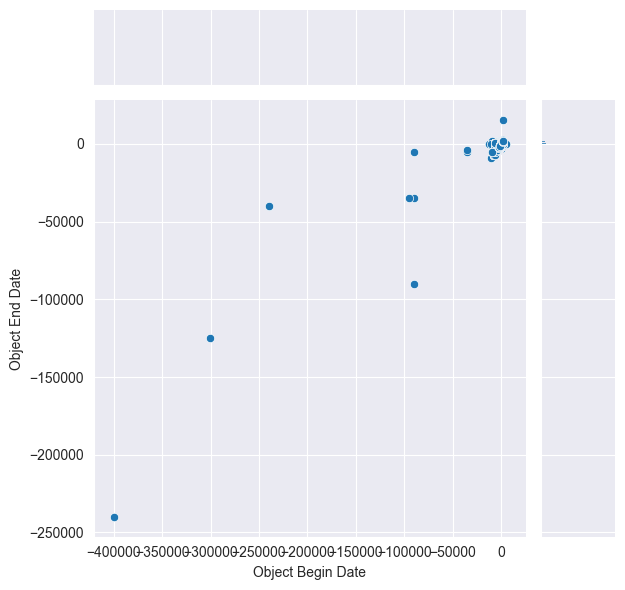

In [99]:
# plot of `Object Begin Date` and `Object End Date`
sns.jointplot(x='Object Begin Date', y='Object End Date', data = df)
# nothing out of ordinary

I only looked at the lower bound for the dates, I wonder what is going on, with the upper bound as well, lets check againts the current year (2022)

In [100]:
df.loc[df['Object Begin Date'] > 2022]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
502176,89.4.1612,False,False,True,NaN,Musical Instruments,1970-01-01 00:00:00.000001889,Bell,Bell,Italian (Ancient Roman),...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,5000–1
502410,89.4.1811,False,False,False,NaN,Musical Instruments,1970-01-01 00:00:00.000001889,Bell,Bell,Italian (Ancient Roman),...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,5000–0


`Object Begin Date` == 5000? definetly outlier

In [101]:
df.loc[df['Object End Date'] > 2022]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
49818,1998.488.2,False,False,True,NaN,Asian Art,1970-01-01 00:00:00.000001998,Frieze section,NaN,India,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,14.0,1950–2099
188903,04.9.19,False,False,True,NaN,European Sculpture and Decorative Arts,1970-01-01 00:00:00.000001904,Bowl,Wide-rimmed bowl with Vulcan Forging Arms with...,"Italian, probably Urbino",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cupid|Venus|Vulcan,http://vocab.getty.edu/page/aat/300380105|http...,https://www.wikidata.org/wiki/Q5011|https://ww...,4.0,1523–335
317192,1999.47.327,False,False,False,NaN,"Arts of Africa, Oceania, and the Americas",1970-01-01 00:00:00.000001999,Ear ornament,Ear or Sideburn Ornament,Shuar or Achuar (?),...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,12.0,1875–2025
317193,1999.47.328,False,False,False,NaN,"Arts of Africa, Oceania, and the Americas",1970-01-01 00:00:00.000001999,Ear ornament,Ear or Sideburn Ornament,Shuar or Achuar (?),...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,12.0,1875–2025
317194,1999.47.329,False,False,False,NaN,"Arts of Africa, Oceania, and the Americas",1970-01-01 00:00:00.000001999,Skirt,Woman's Shell and Beaded Skirt,Shuar or Achuar (?),...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0,1875–2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772746,2019.290.13,False,False,False,NaN,Asian Art,1970-01-01 00:00:00.000002019,Framed hanging scroll,NaN,China,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,21.0,1929–2029
811201,2018.566.1,False,False,False,NaN,Islamic Art,1970-01-01 00:00:00.000002018,Photograph,"Indigo Extraction 1, Tamil Nadu",NaN,...,© Briana Blasko,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,10.0,1985–2035
811202,2018.566.2,False,False,False,NaN,Islamic Art,1970-01-01 00:00:00.000002018,Photograph,"Indigo Extraction 4, Tamil Nadu",NaN,...,© Briana Blasko,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,10.0,1985–2035


We dont know exactly what `Object End Date` exactly means, but I suppose that it can be a future year as well, so values like 20225 make sense, since there could be some contracts for how long the museum will have this item. So lets choose everything with `Object End Date > 2100`

In [102]:
df.loc[df['Object End Date'] > 2100]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
188903,04.9.19,False,False,True,NaN,European Sculpture and Decorative Arts,1970-01-01 00:00:00.000001904,Bowl,Wide-rimmed bowl with Vulcan Forging Arms with...,"Italian, probably Urbino",...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Cupid|Venus|Vulcan,http://vocab.getty.edu/page/aat/300380105|http...,https://www.wikidata.org/wiki/Q5011|https://ww...,4.0,1523–335
363446,24.63.304,False,False,False,NaN,Drawings and Prints,1970-01-01 00:00:00.000001924,Print,La Jeune Parisienne,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0,1790–2835
379662,23.112.1595,False,False,True,NaN,Drawings and Prints,1970-01-01 00:00:00.000001923,Drawing,"Design for Landau, no. 958",NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1850–2870


# 6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature**. _(1 + 3 points, depends on creativity)_

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477804 entries, 1 to 860873
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            477804 non-null  object        
 1   Is Highlight             477804 non-null  bool          
 2   Is Timeline Work         477804 non-null  bool          
 3   Is Public Domain         477804 non-null  bool          
 4   Gallery Number           51725 non-null   float64       
 5   Department               477804 non-null  category      
 6   AccessionYear            474248 non-null  datetime64[ns]
 7   Object Name              476113 non-null  object        
 8   Title                    448619 non-null  object        
 9   Culture                  207379 non-null  object        
 10  Period                   90956 non-null   object        
 11  Dynasty                  23233 non-null   category      
 12  Reign           

### 6a
as already thorougly explained, there are missing data in `Artist Gender`, especially all of the `Male` values

### 6b
there are some missing values for `Object Name` and `Title`.
looking at some of the data, the `Object Name` is sometimes the same as `Title`, lets input one of these if the other is missing. In case both of these are missing, let's use `Unkown`

In [104]:
df.loc[df['Object Name'] == df['Title']]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
36,1976.319,False,False,False,774.0,The American Wing,1970-01-01 00:00:00.000001976,Side Chair,Side Chair,American,...,NaN,http://www.metmuseum.org/art/collection/search/36,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,10.0,1884–7
42,60.58.1,False,False,True,724.0,The American Wing,1970-01-01 00:00:00.000001960,Andiron,Andiron,American,...,NaN,http://www.metmuseum.org/art/collection/search/42,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1795–1810
43,60.58.2,False,False,True,724.0,The American Wing,1970-01-01 00:00:00.000001960,Andiron,Andiron,American,...,NaN,http://www.metmuseum.org/art/collection/search/43,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1795–1810
44,10.125.444a,False,False,True,774.0,The American Wing,1970-01-01 00:00:00.000001910,Andiron,Andiron,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/44,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1787–90
45,10.125.444b,False,False,True,774.0,The American Wing,1970-01-01 00:00:00.000001910,Andiron,Andiron,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/45,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1787–90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856789,48.101.72w,False,False,True,NaN,Islamic Art,1948-01-01 00:00:00.000000000,bead,bead,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,0
856790,48.101.72x,False,False,True,NaN,Islamic Art,1948-01-01 00:00:00.000000000,bead,bead,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,0
856960,"2021.419a, b",False,False,False,NaN,Costume Institute,2021-01-01 00:00:00.000000000,Corset,Corset,Possibly American,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,6.0,1820–30


In [105]:
def input_name_title(row):
    if pd.isnull(row['Object Name']) and pd.isnull(row['Title']):
        row['Object Name'] = 'Unknown'
        row['Title'] = 'Unknown'
    elif pd.isnull(row['Title']):
        row['Title'] = row['Object Name']
    elif pd.isnull(row['Object Name']):
        row['Object Name'] = row['Title']
    return row

In [106]:
df = df.apply(input_name_title, axis=1)

In [107]:
df.loc[df['Object Name'] == df['Title']]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
36,1976.319,False,False,False,774.0,The American Wing,1970-01-01 00:00:00.000001976,Side Chair,Side Chair,American,...,NaN,http://www.metmuseum.org/art/collection/search/36,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,10.0,1884–7
42,60.58.1,False,False,True,724.0,The American Wing,1970-01-01 00:00:00.000001960,Andiron,Andiron,American,...,NaN,http://www.metmuseum.org/art/collection/search/42,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1795–1810
43,60.58.2,False,False,True,724.0,The American Wing,1970-01-01 00:00:00.000001960,Andiron,Andiron,American,...,NaN,http://www.metmuseum.org/art/collection/search/43,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1795–1810
44,10.125.444a,False,False,True,774.0,The American Wing,1970-01-01 00:00:00.000001910,Andiron,Andiron,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/44,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1787–90
45,10.125.444b,False,False,True,774.0,The American Wing,1970-01-01 00:00:00.000001910,Andiron,Andiron,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/45,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,7.0,1787–90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857450,N6538.N5 P62 1967,False,False,False,NaN,The Libraries,NaT,Ten Afro-American artists of the Nineteenth ce...,Ten Afro-American artists of the Nineteenth ce...,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,1967
857471,DT494 .F3 1963,False,False,False,NaN,The Libraries,NaT,West Africa vignettes,West Africa vignettes,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,1963
857476,N6537.H3458 A4 2019 copy 1,False,False,False,NaN,The Libraries,NaT,Trenton Doyle Hancock : mind of the mound : cr...,Trenton Doyle Hancock : mind of the mound : cr...,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,2019


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477804 entries, 1 to 860873
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            477804 non-null  object        
 1   Is Highlight             477804 non-null  bool          
 2   Is Timeline Work         477804 non-null  bool          
 3   Is Public Domain         477804 non-null  bool          
 4   Gallery Number           51725 non-null   float64       
 5   Department               477804 non-null  object        
 6   AccessionYear            474248 non-null  datetime64[ns]
 7   Object Name              477804 non-null  object        
 8   Title                    477804 non-null  object        
 9   Culture                  207379 non-null  object        
 10  Period                   90956 non-null   object        
 11  Dynasty                  23233 non-null   object        
 12  Reign           

# 7. Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later. _(2 points)_

lets take a look at some of the values

In [109]:
df.drop_duplicates(subset=['Medium'])

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1853
15,16.74.49,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Coin,"Coin, 1/2 Real",Mexican,...,NaN,http://www.metmuseum.org/art/collection/search/15,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1665–1700
16,16.74.27,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Peso,"Coin, 1/4 Peso",Mexican,...,NaN,http://www.metmuseum.org/art/collection/search/16,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1800–1900
24,16.74.33,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Centavos,"Coin, 10 Centavos",Mexican,...,NaN,http://www.metmuseum.org/art/collection/search/24,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0,1860–70
33,64.62,False,False,False,774.0,The American Wing,1970-01-01 00:00:00.000001964,Bust,Bust of Abraham Lincoln,American,...,NaN,http://www.metmuseum.org/art/collection/search/33,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Men|Abraham Lincoln|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...,4.0,1876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858218,1980.1124.30,False,False,False,NaN,Drawings and Prints,1980-01-01 00:00:00.000000000,Print,Louis Pierre Baltard,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0,1852
860859,23.112.2889,False,False,True,NaN,Drawings and Prints,1923-01-01 00:00:00.000000000,Drawing,Stanhope Phaeton #21222,NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1897
860860,23.112.2889a,False,False,True,NaN,Drawings and Prints,1923-01-01 00:00:00.000000000,Drawing,"Stanhope Phaeton #21222, #22136, #25312-3",NaN,...,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1897


64686 is too many unique values, lets try to reduce it.

In [110]:
# ignore this
medium_set = set()

In [111]:
import re

def convert(medium):
    # make everything lower case
    medium = str(medium)
    medium = medium.lower()

    # remove () and [] including their contents
    # https://stackoverflow.com/questions/14596884/remove-text-between-and
    medium = re.sub("[\(\[].*?[\)\]]", "", medium)

    # split into list of mediums
    # https://stackoverflow.com/questions/4998629/split-string-with-multiple-delimiters-in-python
    # medium_list_raw = re.split('; |, | or |\n| and | on ', medium)
    medium_list_raw = re.split(';|,| or |\n| and | on |\.', medium)

    medium_list=[]
    for m in medium_list_raw:
        # remove leading and trailing whitespaces
        m.strip()


        # when there is `with` in medium, the 1st part is always the most important
        m = m.split("with")[0]

        # when there are multiple word, the last one is usually the important subject, the words before that are irrelevant adjectives
        m = m.split(" ")[-1]

        m.strip()
        medium_list.append(m.strip())
    # medium_list = medium_list_raw

    # # remove empty substrings
    medium_list = list(filter(len, medium_list))
    # deduplicate substrings
    medium_list = list(set(medium_list))

    # ignore this
    for m in medium_list:
        medium_set.add(m)

    # sort mediums in a list
    medium_list.sort()
    return ", ".join(medium_list)

In [112]:
df.Medium.apply(convert)

Object ID
1                                       gold
2                                       gold
3                                       gold
4                                       gold
5                                       gold
                         ...                
860869    canvas, edge, graphite, perforated
860870                         graphite, ink
860871                               etching
860872                              graphite
860873                                   ink
Name: Medium, Length: 477804, dtype: object

In [113]:
medium_reduced = df.Medium.apply(convert)

In [114]:
# you can ignore this. This is a list of all unique single mediums (not combinations of mediums)
medium_set

{'process-',
 'iii',
 'slit',
 'e-nashiji',
 'sild',
 'cutouts',
 'remounted',
 'textured',
 'saphires',
 'flower',
 'knit',
 'leviathan',
 '36/50',
 '41/50',
 'wood-polychromed',
 'asbestos',
 'polychromy',
 'watelet',
 'stae',
 'greywacke',
 'whistler',
 'burner',
 'materilals',
 'barkcloth',
 'whiteware',
 'glued',
 'pâte',
 'mineral',
 'stone-slate',
 '5',
 'pvc',
 'silk-synthetic',
 'lacewood',
 'pills',
 'sizes',
 'essence',
 'amethyst?',
 'colophon',
 'chloromelanite',
 'surfaces',
 'directors',
 'enamelled',
 'known',
 'scraped',
 'banderoles',
 'chestnut',
 'brick',
 'granite',
 'limewood',
 'white',
 'hotei',
 'haircloth',
 'handmade',
 'thorn',
 'copper/bronze',
 'fame',
 'extant',
 'grapes',
 'transparencies',
 'graywacke',
 'ii/iv',
 'of',
 'shrine',
 'biscuit',
 'spar',
 'potin',
 'black-white',
 'cupola',
 'striated',
 'amaranth',
 'illustrations:engraving',
 'calculations',
 '42)',
 'pens',
 'flint',
 'reddish',
 'moire',
 'glitter',
 'drawers',
 'tie',
 'gourds',
 '184

57527 is better, but still a lot of values

I'd like to use 1hot encoding, however with this amount of categories/values for medium, it would a curse of dimensionality. Because of that, I will converted it to a numeric value, which is not good, but maybe we can still find out smth from it.

In [115]:
df['medium_categorical'] = medium_reduced.astype('category')

In [116]:
# convert into categorical and then into integer value
#https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe
df['medium_num'] = df[['medium_categorical']].apply(lambda x: x.cat.codes)
df['medium_num']

Object ID
1         20924
2         20924
3         20924
4         20924
5         20924
          ...  
860869     9841
860870    22058
860871    17927
860872    22016
860873    23292
Name: medium_num, Length: 477804, dtype: int16

# 8. Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature. _(2 points)_

In [117]:
# lets take a look how the data generally looks
df.drop_duplicates(subset=['Dimensions'])


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined,medium_categorical,medium_num
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1853,gold,20924
3,67.265.9,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1909–27,gold,20924
15,16.74.49,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Coin,"Coin, 1/2 Real",Mexican,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1665–1700,silver,28533
16,16.74.27,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Peso,"Coin, 1/4 Peso",Mexican,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,4.0,1800–1900,"bronze, copper",7848
24,16.74.33,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001916,Centavos,"Coin, 10 Centavos",Mexican,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,8.0,1860–70,nickel,26691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860865,53.600.1438,False,False,False,NaN,Drawings and Prints,1953-01-01 00:00:00.000000000,Print,Patie and Roger,NaN,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0,1753–63,etching,17927
860866,23.112.2892,False,False,True,NaN,Drawings and Prints,1923-01-01 00:00:00.000000000,Drawing,Stanhope Phaeton #23533,NaN,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1897,"canvas, edge, graphite, perforated",9841
860867,53.600.1437,False,False,False,NaN,Drawings and Prints,1953-01-01 00:00:00.000000000,Print,Roger and Jenny,NaN,...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,5.0,1753–63,etching,17927


In [118]:
def remove_units(value, is_in_cm: bool, is_in_inch: bool):
    if is_in_cm:
        return value.split('cm')[0].strip()
    if is_in_inch:
        return value.split('in')[0].strip()
    return value.strip()

def convert_unit(value, is_in_inch: bool):
    if is_in_inch:
        try:
            return float(value) / 2.54
        except:
            return '-1'
    return value

# got a bit inspired by https://discord.com/channels/366970031445377024/756554669190414406/1034404910017552384
def process_dimensions_i_cm(orig_dim) -> tuple[int, int, int]:
    # take contents of a (). In case there is multiple of them, take the first one
    parentheses_insides = re.findall("\((.*?)\)", str(orig_dim))
    if len(parentheses_insides) == 0:
        # return
        return -1, -1, -1
    parentheses_inside = parentheses_insides[0]

    # sometime multiple units are used, lets pick the last one, which is usually in centimeters
    parentheses_inside = parentheses_inside.split(', ')[-1]

    is_in_cm = 'cm' in parentheses_inside
    is_in_inch = 'in' in parentheses_inside

    if is_in_cm and is_in_inch:
        print(f"BOTH MEASUREMENTS: {parentheses_inside}")

    # split by ' X ' since sometimes there are multiple dimensions and sometimes not
    dimensions = parentheses_inside.split(' x ')

    # usually in the "last" dimension are also the measurements. Lets remove it


    # # untested alternative
    # dimensions[-1] = remove_units(dimensions[-1], is_in_cm, is_in_inch)
    # out_dimensions = [0, 0, 0]
    # for d in range(len(dimensions)):
    #     out_dimensions[i] = convert_unit(dimensions[i], is_in_inch)
    # return out_dimensions

    if len(dimensions) == 1:
        dimensions[0] = remove_units(dimensions[0], is_in_cm, is_in_inch)
        dimensions[0] = convert_unit(dimensions[0], is_in_inch)
        return dimensions[0], 0, 0
    if len(dimensions) == 2:
        dimensions[1] = remove_units(dimensions[1], is_in_cm, is_in_inch)
        dimensions[0] = convert_unit(dimensions[0], is_in_inch)
        dimensions[1] = convert_unit(dimensions[1], is_in_inch)
        return dimensions[0], dimensions[1], 0
    if len(dimensions) >= 3:
        dimensions[2] = remove_units(dimensions[2], is_in_cm, is_in_inch)
        dimensions[0] = convert_unit(dimensions[0], is_in_inch)
        dimensions[1] = convert_unit(dimensions[1], is_in_inch)
        dimensions[2] = convert_unit(dimensions[2], is_in_inch)
        return dimensions[0], dimensions[1], dimensions[2]

    return parentheses_inside

In [119]:
dimensions_cols = df.apply(lambda x: process_dimensions_i_cm(x['Dimensions']), axis='columns', result_type='expand')
dimensions_cols = dimensions_cols.rename(columns={0: 'width', 1: 'depth', 2: 'height'})
df = pd.concat([df, dimensions_cols], axis='columns')
# df = df.rename(columns={0: 'width', 1: 'depth', 2: 'height'})
# for index, row in df.iterrows():
#     width, depth, height = process_dimensions_i_cm(row['Dimensions'])
#     row['width'] = width
#     row['depth'] = depth
#     row['height'] = height


BOTH MEASUREMENTS: 504 in. x 45.7 cm
BOTH MEASUREMENTS: 504 in. x 45.7 cm
BOTH MEASUREMENTS: 73 cm; L. of blade 24 in. (61 cm
BOTH MEASUREMENTS:  30.6 cm; W.  5 3/32 in. (12.9 cm
BOTH MEASUREMENTS: w/o base: 8 3/4 in. (22.2 cm
BOTH MEASUREMENTS: 3.8 cm0; W. 1 7/8 in. (4.8 cm
BOTH MEASUREMENTS: 1 15/16 in. (4.9 cm
BOTH MEASUREMENTS: H. with cover: 2 1/4 in. (5.7 cm
BOTH MEASUREMENTS: 4.4 cm; W. 4 1/2 in. (11.4 cm
BOTH MEASUREMENTS: 5.4 cm0; W. 2 1/8 in. (5.4 cm
BOTH MEASUREMENTS: 3.5 cm0; W. 1 1/3 in. (3.2 cm
BOTH MEASUREMENTS: 5.7 cm0; W. 7/8 in. (2.2 cm
BOTH MEASUREMENTS: 3.2 cm0; W. 1 1/2 in. (3.8 cm
BOTH MEASUREMENTS: 3.5 cm0; W. 1 5/8 in. (4.1 cm
BOTH MEASUREMENTS: 4.4 cm0; W. 1 1/4 in. (3.2 cm
BOTH MEASUREMENTS: 4.4 cm0; W. 1 1/4 in. (3.2 cm
BOTH MEASUREMENTS: 1 cm; L. 2 3/4 in. (7 cm
BOTH MEASUREMENTS: L. 4 1/8 in. (10.5 cm
BOTH MEASUREMENTS: 1 1/4 in. (3.2 cm
BOTH MEASUREMENTS: 10.8 cm x 6.3 in.
BOTH MEASUREMENTS: H including lions 8.3 x D 0.7 x Diam 7.2 cm
BOTH MEASUREMENTS: 12

In [120]:
df

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Tags,Tags AAT URL,Tags Wikidata URL,Object_name_len,object_date_combined,medium_categorical,medium_num,width,depth,height
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,NaN,4.0,1853,gold,20924,-1,-1,-1
2,1980.264.5,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,NaN,4.0,1901,gold,20924,-1,-1,-1
3,67.265.9,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,4.0,1909–27,gold,20924,1.7,0,0
4,67.265.10,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,4.0,1909–27,gold,20924,1.7,0,0
5,67.265.11,False,False,False,NaN,The American Wing,1970-01-01 00:00:00.000001967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,NaN,4.0,1909–27,gold,20924,1.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860869,23.112.2893,False,False,True,NaN,Drawings and Prints,1923-01-01 00:00:00.000000000,Drawing,Phaeton #24567,NaN,...,Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1904,"canvas, edge, graphite, perforated",9841,34.3 × 57.2,0,0
860870,23.112.2894,False,False,True,NaN,Drawings and Prints,1923-01-01 00:00:00.000000000,Drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,...,Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,7.0,1904,"graphite, ink",22058,33 × 56.5,0,0
860871,53.600.1434,False,False,False,NaN,Drawings and Prints,1953-01-01 00:00:00.000000000,Print,"Forest landscape with cattle drinking, a woman...",NaN,...,NaN,NaN,NaN,5.0,1768–78,etching,17927,29.6 × 19.4,0,0
